# Лабораторная работа №5

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data=pd.read_csv('framingham.csv')
data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [3]:
data.rename(columns={'male':'sex_male'},inplace=True)
data.head()

sex_male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0         1   39        4.0              0         0.0     0.0   
1         0   46        2.0              0         0.0     0.0   
2         1   48        1.0              1        20.0     0.0   
3         0   61        3.0              1        30.0     0.0   
4         0   46        3.0              1        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    195.0  106.0   70.0  26.97   
1                0             0         0    250.0  121.0   81.0  28.73   
2                0             0         0    245.0  127.5   80.0  25.34   
3                0             1         0    225.0  150.0   95.0  28.58   
4                0             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose  TenYearCHD  
0       80.0     77.0           0  
1       95.0     76.0           0  
2       75.0     70.0           0  
3       65.0    103.0           1  
4       85.0     85.0           0

In [4]:
data.columns

Index(['sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
data.isnull().sum()

sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data.size

67808

In [7]:
data=data.dropna()
data.isnull().sum()

sex_male           0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
data.corr()

sex_male       age  education  currentSmoker  cigsPerDay  \
sex_male         1.000000 -0.024387   0.017677       0.206778    0.331243   
age             -0.024387  1.000000  -0.158961      -0.210862   -0.189099   
education        0.017677 -0.158961   1.000000       0.025253    0.013527   
currentSmoker    0.206778 -0.210862   0.025253       1.000000    0.773819   
cigsPerDay       0.331243 -0.189099   0.013527       0.773819    1.000000   
BPMeds          -0.052128  0.134670  -0.013647      -0.051936   -0.046479   
prevalentStroke -0.002308  0.050864  -0.030353      -0.038159   -0.036283   
prevalentHyp     0.000806  0.306693  -0.079100      -0.107561   -0.069890   
diabetes         0.013833  0.109027  -0.039547      -0.041859   -0.036934   
totChol         -0.070229  0.267764  -0.012956      -0.051119   -0.030222   
sysBP           -0.045484  0.388551  -0.124511      -0.134371   -0.094764   
diaBP            0.051575  0.208880  -0.058502      -0.115748   -0.056650   
BMI              0.072867  0.137172  -0.137280      -0.159574   -0.086888   
heartRate       -0.114923 -0.002685  -0.064254       0.050452    0.063549   
glucose          0.003048  0.118245  -0.031874      -0.053346   -0.053803   
TenYearCHD       0.091745  0.233810  -0.063068       0.019176    0.052159   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
sex_male        -0.052128        -0.002308      0.000806  0.013833 -0.070229   
age              0.134670         0.050864      0.306693  0.109027  0.267764   
education       -0.013647        -0.030353     -0.079100 -0.039547 -0.012956   
currentSmoker   -0.051936        -0.038159     -0.107561 -0.041859 -0.051119   
cigsPerDay      -0.046479        -0.036283     -0.069890 -0.036934 -0.030222   
BPMeds           1.000000         0.113119      0.263047  0.049051  0.094011   
prevalentStroke  0.113119         1.000000      0.066098  0.009619  0.012697   
prevalentHyp     0.263047         0.066098      1.000000  0.080623  0.167074   
diabetes         0.049051         0.009619      0.080623  1.000000  0.048371   
totChol          0.094011         0.012697      0.167074  0.048371  1.000000   
sysBP            0.271291         0.061080      0.697790  0.102574  0.220130   
diaBP            0.199750         0.055878      0.617634  0.050767  0.174986   
BMI              0.105603         0.036478      0.302917  0.088970  0.120799   
heartRate        0.012894        -0.017020      0.147333  0.060996  0.093057   
glucose          0.054210         0.016051      0.087129  0.614817  0.049749   
TenYearCHD       0.089116         0.048351      0.181556  0.093397  0.091127   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
sex_male        -0.045484  0.051575  0.072867  -0.114923  0.003048    0.091745  
age              0.388551  0.208880  0.137172  -0.002685  0.118245    0.233810  
education       -0.124511 -0.058502 -0.137280  -0.064254 -0.031874   -0.063068  
currentSmoker   -0.134371 -0.115748 -0.159574   0.050452 -0.053346    0.019176  
cigsPerDay      -0.094764 -0.056650 -0.086888   0.063549 -0.053803    0.052159  
BPMeds           0.271291  0.199750  0.105603   0.012894  0.054210    0.089116  
prevalentStroke  0.061080  0.055878  0.036478  -0.017020  0.016051    0.048351  
prevalentHyp     0.697790  0.617634  0.302917   0.147333  0.087129    0.181556  
diabetes         0.102574  0.050767  0.088970   0.060996  0.614817    0.093397  
totChol          0.220130  0.174986  0.120799   0.093057  0.049749    0.091127  
sysBP            1.000000  0.786727  0.331004   0.184901  0.134702    0.222885  
diaBP            0.786727  1.000000  0.385611   0.179008  0.063704    0.150342  
BMI              0.331004  0.385611  1.000000   0.074401  0.083671    0.081931  
heartRate        0.184901  0.179008  0.074401   1.000000  0.097026    0.020523  
glucose          0.134702  0.063704  0.083671   0.097026  1.000000    0.121942  
TenYearCHD       0.222885  0.150342  0.081931   0.

In [9]:
print(data.groupby('TenYearCHD').size())

TenYearCHD
0    3099
1     557
dtype: int64


In [10]:
X=data[data.columns]
X=X.drop(columns=['TenYearCHD'])
X.head()

sex_male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0         1   39        4.0              0         0.0     0.0   
1         0   46        2.0              0         0.0     0.0   
2         1   48        1.0              1        20.0     0.0   
3         0   61        3.0              1        30.0     0.0   
4         0   46        3.0              1        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    195.0  106.0   70.0  26.97   
1                0             0         0    250.0  121.0   81.0  28.73   
2                0             0         0    245.0  127.5   80.0  25.34   
3                0             1         0    225.0  150.0   95.0  28.58   
4                0             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose  
0       80.0     77.0  
1       95.0     76.0  
2       75.0     70.0  
3       65.0    103.0  
4       85.0     85.0

In [11]:
Y=data['TenYearCHD']
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [12]:
from sklearn.feature_selection import SelectKBest,chi2
test=SelectKBest(score_func=chi2,k=10)
fit=test.fit(X,Y)
print(fit.scores_)

[ 17.12043013 295.50776101   7.67979651   0.68691311 156.56731824
  28.15300258   8.49782271  82.96718408  31.02798685 249.15307765
 669.50655224 142.87857382  15.73071703   2.91906232 379.58313716]


In [13]:
X.columns

Index(['sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [14]:
X=data[['age','cigsPerDay','totChol','sysBP','diaBP','glucose']]
X.head()

age  cigsPerDay  totChol  sysBP  diaBP  glucose
0   39         0.0    195.0  106.0   70.0     77.0
1   46         0.0    250.0  121.0   81.0     76.0
2   48        20.0    245.0  127.5   80.0     70.0
3   61        30.0    225.0  150.0   95.0    103.0
4   46        23.0    285.0  130.0   84.0     85.0

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_x.fit(X)
sc_X = sc_x.transform(X)

In [16]:
X = pd.DataFrame(sc_X, columns = X.columns)

In [17]:
X.head()

age  cigsPerDay   totChol     sysBP     diaBP   glucose
0 -1.233351   -0.757068 -0.949714 -1.193695 -1.078415 -0.203127
1 -0.415591   -0.757068  0.297729 -0.514637 -0.159695 -0.244956
2 -0.181945    0.921174  0.184325 -0.220378 -0.243215 -0.495930
3  1.336754    1.760294 -0.269291  0.798209  1.009584  0.884427
4 -0.415591    1.172910  1.091556 -0.107202  0.090864  0.131505

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

-------------------------------



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score,\
classification_report, recall_score

### Для решения задачи бинарной классификации используется логистическая регрессия

In [20]:
reg1 = LogisticRegression().fit(x_train, y_train)
print('Коэффициенты:', reg1.coef_)
print('w0:', reg1.intercept_)

Коэффициенты: [[0.54282169 0.29449837 0.11139801 0.30639689 0.07183195 0.19233681]]
w0: [-1.9225912]


In [21]:
y_predicted=reg1.predict(x_test)

In [22]:
accuracy_score(y_test, y_predicted)

0.860655737704918

In [23]:
confusion_matrix(y_test, y_predicted, labels=[0, 1])

array([[622,   5],
       [ 97,   8]], dtype=int64)

In [24]:
classification_report(y_test, y_predicted, output_dict = True)

{'0': {'precision': 0.8650904033379694,
  'recall': 0.9920255183413078,
  'f1-score': 0.9242199108469539,
  'support': 627},
 '1': {'precision': 0.6153846153846154,
  'recall': 0.0761904761904762,
  'f1-score': 0.13559322033898308,
  'support': 105},
 'accuracy': 0.860655737704918,
 'macro avg': {'precision': 0.7402375093612924,
  'recall': 0.534107997265892,
  'f1-score': 0.5299065655929684,
  'support': 732},
 'weighted avg': {'precision': 0.8292719501479392,
  'recall': 0.860655737704918,
  'f1-score': 0.8110972298314661,
  'support': 732}}

### Cтохастический градиентый спуск

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
print('Размер выборки - {}'.format(X.shape[0]))
reg2 = SGDClassifier().fit(x_train, y_train)

Размер выборки - 3656


In [27]:
y_predicted=reg2.predict(x_test)

In [28]:
accuracy_score(y_test, y_predicted)

0.855191256830601

In [29]:
classification_report(y_test, y_predicted, output_dict = True, zero_division=0 )

{'0': {'precision': 0.8603042876901799,
  'recall': 0.9920255183413078,
  'f1-score': 0.9214814814814816,
  'support': 627},
 '1': {'precision': 0.4444444444444444,
  'recall': 0.0380952380952381,
  'f1-score': 0.07017543859649124,
  'support': 105},
 'accuracy': 0.855191256830601,
 'macro avg': {'precision': 0.6523743660673121,
  'recall': 0.515060378218273,
  'f1-score': 0.4958284600389864,
  'support': 732},
 'weighted avg': {'precision': 0.8006522609950949,
  'recall': 0.855191256830601,
  'f1-score': 0.7993679097561756,
  'support': 732}}

#### В гашем случае метод стохастического градиентного спуска показывает почти такие же рзультаты, как и логистичская регрессия. Рекомендуется использовать, если размер выборки превышает 100 000







------------------------------------------


## Метод опорных векторов

In [30]:
from sklearn.svm import SVC, NuSVC, LinearSVC

### основной классификатор на основе SVM, поддерживающий различные ядра

In [31]:
svc3=SVC(kernel='sigmoid', gamma=0.05,  C=1.0).fit(x_train, y_train)
y_predicted=svc3.predict(x_test)
print('accuracy score:', accuracy_score(y_test, y_predicted))

accuracy score: 0.8510928961748634


In [32]:
svc4=SVC(kernel='poly', gamma=0.9, degree=3,  C=1.0).fit(x_train, y_train)
y_predicted=svc4.predict(x_test)
print('accuracy score:', accuracy_score(y_test, y_predicted))

accuracy score: 0.8592896174863388


In [33]:
svc5=SVC(C=1.0).fit(x_train, y_train)
y_predicted=svc5.predict(x_test)
print('accuracy score:', accuracy_score(y_test, y_predicted))

accuracy score: 0.8565573770491803


In [34]:
svc1=SVC(kernel='linear', C=1.0).fit(x_train, y_train)
y_predicted=svc1.predict(x_test)
print('accuracy score:', accuracy_score(y_test, y_predicted))

accuracy score: 0.8565573770491803


### линейный классификатор на основе SVM

In [35]:
svc2=LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000).fit(x_train, y_train)
print(svc1.coef_)
y_predicted=svc2.predict(x_test)
print('accuracy score:', accuracy_score(y_test, y_predicted))

[[ 3.88799625e-05  1.44798361e-05  7.40183805e-06  5.96677918e-05
   1.21357603e-05 -2.45825780e-05]]
accuracy score: 0.8565573770491803


--------------------------
## Деревья решений

In [36]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from graphviz import Source
from sklearn import tree

In [37]:
tree1 = DecisionTreeClassifier(random_state=1).fit(x_train,y_train)
y_predicted=tree1.predict(x_test)
print('accuracy score:', accuracy_score(y_test, y_predicted))

accuracy score: 0.7814207650273224


In [38]:
graph = Source( tree.export_graphviz(tree1, out_file=None, feature_names=X.columns, filled=True, rounded=True,\
                                     special_characters=True))
png_bytes = graph.pipe(format='png')
from IPython.display import Image
Image(png_bytes, width='100%')

In [39]:
list(zip(X.columns.values, tree1.feature_importances_))

[('age', 0.16324377696256448),
 ('cigsPerDay', 0.08169963679508764),
 ('totChol', 0.19229326410628272),
 ('sysBP', 0.20033101779854234),
 ('diaBP', 0.17633472077500062),
 ('glucose', 0.18609758356252212)]

In [40]:
from operator import itemgetter

In [41]:
def draw_feature_importances(tree_model, X_dataset, figsize=(15,7)):
   
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    plt.title('Важность признаков')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

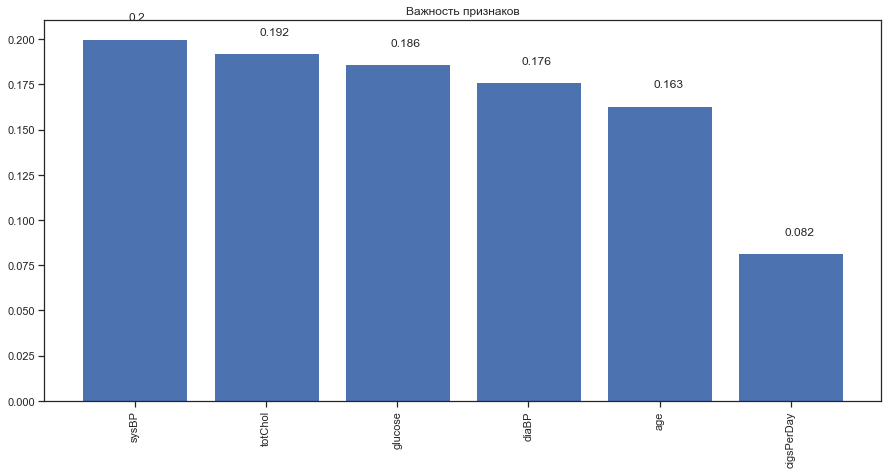

In [42]:
tree_cl_fl, tree_cl_fd = draw_feature_importances(tree1,X)